In [51]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import StratifiedKFold

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
PATH_TO_DATA = './data'
train_df = pd.read_csv(os.path.join(PATH_TO_DATA,'train_features.csv'), index_col='match_id_hash')
target_df = pd.read_csv(os.path.join(PATH_TO_DATA,'train_targets.csv'), index_col='match_id_hash')
test_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'test_features.csv'), index_col='match_id_hash')

In [13]:
print("train feature shape {0}".format(train_df.shape))
print("train target shape {0}".format(target_df.shape))
print("test feature shape {0}".format(test_df.shape))

train feature shape (39675, 245)
train target shape (39675, 5)
test feature shape (10000, 245)


In [15]:
target_df.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [17]:
target_df['radiant_win'].value_counts()

True     20826
False    18849
Name: radiant_win, dtype: int64

In [19]:
train_df.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.00,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.25,0,0,0,0


In [20]:
train_df['game_mode'].value_counts()

22    31762
4      3564
23     2546
3      1200
2       408
5       188
12        5
16        2
Name: game_mode, dtype: int64

In [43]:
test_df['game_mode'].value_counts()

22    8289
4      680
23     629
3      337
2       34
5       28
12       3
Name: game_mode, dtype: int64

### Plotting. Counts of the game modes.

#### Pandas

Text(0, 0.5, 'Counts')

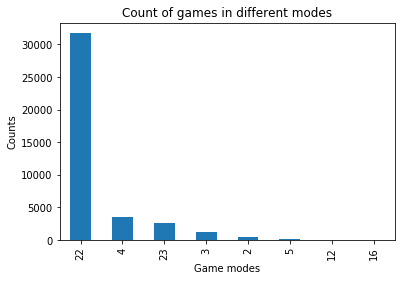

In [22]:
ax = train_df['game_mode'].value_counts().plot(kind='bar', title='Count of games in different modes')
ax.set_xlabel('Game modes')
ax.set_ylabel('Counts')

#### Matplotlib

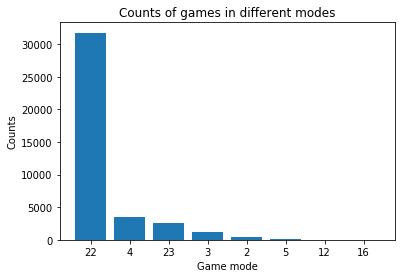

In [28]:
train_modes = train_df['game_mode'].value_counts().reset_index().rename(columns={'index': 'game_mode', 'game_mode': 'count'})
train_modes

plt.bar(range(len(train_modes['game_mode'])), train_modes['count']);
plt.xticks(range(len(train_modes['game_mode'])), train_modes['game_mode']);
plt.xlabel('Game mode');
plt.ylabel('Counts');
plt.title('Counts of games in different modes');

#### Seaborn

C:\Users\sepolt\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


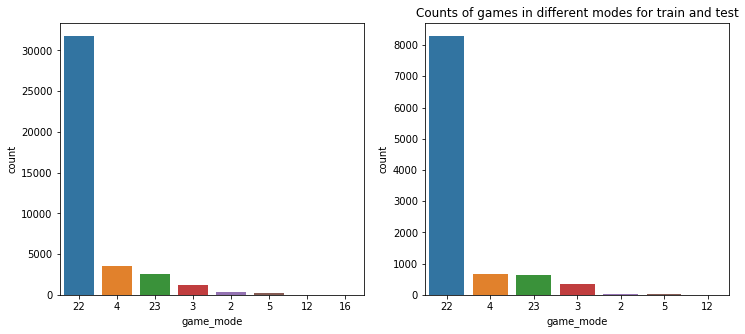

In [42]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
fig
sns.countplot(data=train_df, x='game_mode', order=train_df['game_mode'].value_counts().index,  ax=ax[0]);
sns.countplot(data=test_df, x='game_mode', order=test_df['game_mode'].value_counts().index,  ax=ax[1]);
plt.title('Counts of games in different modes for train and test');
fig.show()

### Distribution of the wins and losses by game mode

In [35]:
train_df['radiant_win'] = target_df['radiant_win']

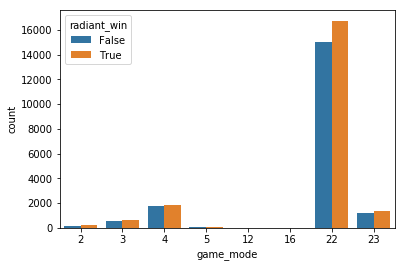

In [36]:
sns.countplot(x='game_mode', hue='radiant_win', data=train_df);

### Distribution of the game time

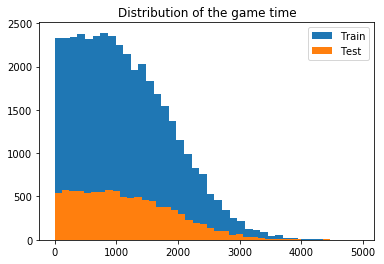

In [46]:
plt.hist(train_df['game_time'], bins=40, label='Train')
plt.hist(test_df['game_time'], bins=40, label='Test')
plt.title('Distribution of the game time')
plt.legend()

### Player features

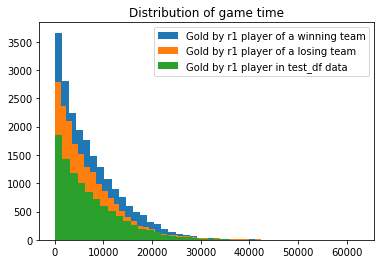

In [49]:
plt.hist(train_df.loc[train_df['radiant_win'] == True, 'r1_gold'], bins=40, label='Gold by r1 player of a winning team');
plt.hist(train_df.loc[train_df['radiant_win'] == False, 'r1_gold'], bins=40, label='Gold by r1 player of a losing team');
plt.hist(test_df['r1_gold'], bins=40, label='Gold by r1 player in test_df data');
plt.title('Distribution of game time');
plt.legend();